## African Conflicts
The data is from African Conflict Location and Event Data Project and can be downloaded from Kaggle https://www.kaggle.com/jboysen/african-conflicts

From the Kaggle Description:

"This dataset codes the dates and locations of all reported political violence and protest events in dozens of developing countries in Africa. Political violence and protest includes events that occur within civil wars and periods of instability, public protest and regime breakdown. The project covers all African countries from 1997 to the present."

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
pd.options.display.max_columns = 999
df = pd.read_csv('african_conflicts.csv', encoding ='latin1', low_memory = False)
df.head()

,ACTOR1,ACTOR1_ID,ACTOR2,ACTOR2_ID,ACTOR_DYAD_ID,ADMIN1,ADMIN2,ADMIN3,ALLY_ACTOR_1,ALLY_ACTOR_2,COUNTRY,EVENT_DATE,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_TYPE,FATALITIES,GEO_PRECISION,GWNO,INTER1,INTER2,INTERACTION,LATITUDE,LOCATION,LONGITUDE,NOTES,SOURCE,TIME_PRECISION,YEAR
0,Police Forces of Algeria (1999-),NaN,Civilians (Algeria),NaN,NaN,Tizi Ouzou,Beni-Douala,NaN,NaN,Berber Ethnic Group (Algeria),Algeria,18/04/2001,1416RTA,NaN,Violence against civilians,1,1,615,1,7,17,36.61954,Beni Douala,4.08282,A Berber student was shot while in police cust...,Associated Press Online,1,2001
1,Rioters (Algeria),NaN,Police Forces of Algeria (1999-),NaN,NaN,Tizi Ouzou,Tizi Ouzou,NaN,Berber Ethnic Group (Algeria),NaN,Algeria,19/04/2001,2229RTA,NaN,Riots/Protests,0,3,615,5,1,15,36.71183,Tizi Ouzou,4.04591,Riots were reported in numerous villages in Ka...,Kabylie report,1,2001
2,Protesters (Algeria),NaN,NaN,NaN,NaN,Bejaia,Amizour,NaN,Students (Algeria),NaN,Algeria,20/04/2001,2230RTA,NaN,Riots/Protests,0,1,615,6,0,60,36.64022,Amizour,4.90131,Students protested in the Amizour area. At lea...,Crisis Group,1,2001
3,Rioters (Algeria),NaN,Police Forces of Algeria (1999-),NaN,NaN,Bejaia,Amizour,NaN,Berber Ethnic Group (Algeria),NaN,Algeria,21/04/2001,2231RTA,NaN,Riots/Protests,0,1,615,5,1,15,36.64022,Amizour,4.90131,"Rioters threw molotov cocktails, rocks and bur...",Kabylie report,1,2001
4,Rioters (Algeria),NaN,Police Forces of Algeria (1999-),NaN,NaN,Tizi Ouzou,Beni-Douala,NaN,Berber Ethnic Group (Algeria),NaN,Algeria,21/04/2001,2232RTA,NaN,Riots/Protests,0,1,615,5,1,15,36.61954,Beni Douala,4.08282,"Rioters threw molotov cocktails, rocks and bur...",Kabylie report,1,2001


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 28 columns):
ACTOR1              165808 non-null object
ACTOR1_ID           140747 non-null float64
ACTOR2              122255 non-null object
ACTOR2_ID           140747 non-null float64
ACTOR_DYAD_ID       140747 non-null object
ADMIN1              165808 non-null object
ADMIN2              165676 non-null object
ADMIN3              86933 non-null object
ALLY_ACTOR_1        28144 non-null object
ALLY_ACTOR_2        19651 non-null object
COUNTRY             165808 non-null object
EVENT_DATE          165808 non-null object
EVENT_ID_CNTY       165808 non-null object
EVENT_ID_NO_CNTY    140747 non-null float64
EVENT_TYPE          165808 non-null object
FATALITIES          165808 non-null int64
GEO_PRECISION       165808 non-null int64
GWNO                165808 non-null int64
INTER1              165808 non-null int64
INTER2              165808 non-null int64
INTERACTION         165808 non-nul

There are a lot of columns|variables|features in this data set. I'm particularly interested Country where a conflict occured, which countries or groups of people were involved, when the event took place, How many fatalities, some notes on the conflict, and what type of conflict was it.

So I am going to limit our data set to these columns



In [52]:
df = df.loc[:,['ACTOR1', 'ACTOR2', 'ADMIN1', 'ADMIN2','COUNTRY', 'LOCATION', 'EVENT_DATE', 'EVENT_TYPE', 'INTERACTION', 'FATALITIES', 'NOTES']]
df.head()

,ACTOR1,ACTOR2,ADMIN1,ADMIN2,COUNTRY,LOCATION,EVENT_DATE,EVENT_TYPE,INTERACTION,FATALITIES,NOTES
0,Police Forces of Algeria (1999-),Civilians (Algeria),Tizi Ouzou,Beni-Douala,Algeria,Beni Douala,18/04/2001,Violence against civilians,17,1,A Berber student was shot while in police cust...
1,Rioters (Algeria),Police Forces of Algeria (1999-),Tizi Ouzou,Tizi Ouzou,Algeria,Tizi Ouzou,19/04/2001,Riots/Protests,15,0,Riots were reported in numerous villages in Ka...
2,Protesters (Algeria),NaN,Bejaia,Amizour,Algeria,Amizour,20/04/2001,Riots/Protests,60,0,Students protested in the Amizour area. At lea...
3,Rioters (Algeria),Police Forces of Algeria (1999-),Bejaia,Amizour,Algeria,Amizour,21/04/2001,Riots/Protests,15,0,"Rioters threw molotov cocktails, rocks and bur..."
4,Rioters (Algeria),Police Forces of Algeria (1999-),Tizi Ouzou,Beni-Douala,Algeria,Beni Douala,21/04/2001,Riots/Protests,15,0,"Rioters threw molotov cocktails, rocks and bur..."


The column Interaction actually tells us quite a bit. The first digit is the type of Actor 1, and the second digit is the type of Actor 2. From the Userguide:

A numeric code indicating the interaction 
between types of ACTOR1 and ACTOR2. 
Coded as an interaction between
actor types, and recorded as
lowest joint number:

- 1 Government/Military/Police
- 2 Rebel group
- 3 Political Militia
- 4 Communal Militia
- 5 Rioters
- 6 Protestors
- 7 Civilians
- 8 Other (e.g. Regional groups
such as AFICOM; or UN


e.g.  When  the  action  is 
between   a 
government   and   a 
rebel  group,  this  will  be  coded  as 
12; when a political militia attacks 
civilians, it is coded as 37.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165808 entries, 0 to 165807
Data columns (total 11 columns):
ACTOR1         165808 non-null object
ACTOR2         122255 non-null object
ADMIN1         165808 non-null object
ADMIN2         165676 non-null object
COUNTRY        165808 non-null object
LOCATION       165805 non-null object
EVENT_DATE     165808 non-null object
EVENT_TYPE     165808 non-null object
INTERACTION    165808 non-null int64
FATALITIES     165808 non-null int64
NOTES          155581 non-null object
dtypes: int64(2), object(9)
memory usage: 13.9+ MB


Suprisingly the above shows that we don't have a lot of Null values. Only in places we might expect such as 'Notes' or 'Actor2'. I know I'm want to explore conflicts as they progress over time so I better enocde Event_Date as a datetime object

In [54]:
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'])

### Exploratory Data Analysis

Off the bat here are some things I'm curious about:

- In the last 5 years which African country had the most conflict events?
- most fatalities?
- what type of events were those?


In [72]:
df[doi].COUNTRY.value_counts().head(10)

Somalia                         16916
Nigeria                          8933
South Africa                     8425
Sudan                            7849
Egypt                            7829
Democratic Republic of Congo     6368
Libya                            5752
South Sudan                      5083
Burundi                          4479
Tunisia                          3740
Name: COUNTRY, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

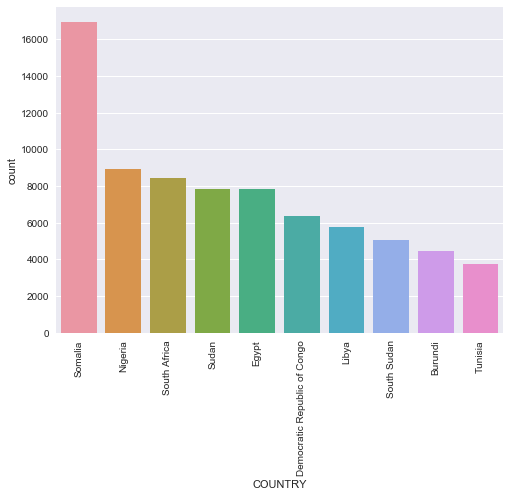

In [55]:
doi = df['EVENT_DATE'] > '2012'
plt.figure(figsize=(8,6))
sns.countplot(x = 'COUNTRY',data = df[doi], order=df[doi].COUNTRY.value_counts().head(10).index,
             )
plt.xticks(rotation = 90)

In the last 5 years Somalia by far has had the most events, more that double that most of the other African Countries. The list isnt too suprising if you've been paying attention to the news. We see some North African Countries: Libya, Tunisia, Egypt so this data shows the after effects of Arab Springs. Remember also that in 2011 Gadaffi was overthrown.

Lets see this list by fatalities

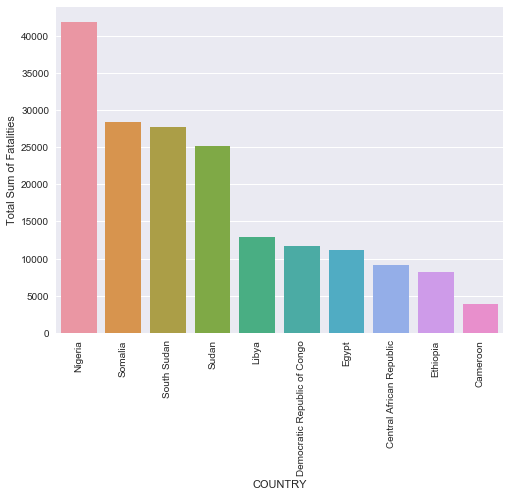

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(x='COUNTRY', y='FATALITIES', data = df[doi],
            estimator = sum,
            ci = None,
           order = df[doi].groupby('COUNTRY')['FATALITIES'].sum().sort_values(ascending = False).head(10).index)

plt.xticks(rotation = 90)
plt.ylabel('Total Sum of Fatalities')

Very very interesting! Although Somalia had the most number of incidents, Nigeria by far had the most fatalities. I wonder what type of conflicts occured there? Lets take a look!

In [93]:
dfdoi = df[doi]


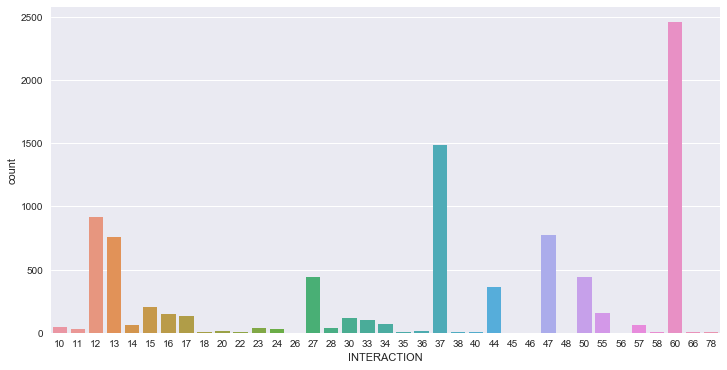

In [95]:
nigeria = dfdoi['COUNTRY']=='Nigeria'
plt.figure(figsize = (12,6))
sns.countplot(x = 'INTERACTION', data = dfdoi[nigeria])

60 refers to Protestors Sole Action, that actually is a decent measure of unrest in a country, and entirely possible there were no fatalities during many of these protests. Lets do a quick pandas query sorting INTERACTION type by number of fatalities

In [99]:
dfdoi[nigeria].groupby('INTERACTION')['FATALITIES'].sum().sort_values(ascending = False)

INTERACTION
12    9807
37    8388
27    7781
47    5730
13    3951
44    1432
17    1285
28     681
34     588
15     428
33     390
14     339
23     284
24     238
55     189
16      69
22      46
50      44
57      41
11      32
20      14
78      10
38       8
56       8
30       5
36       5
35       2
46       2
60       2
18       1
58       1
26       0
66       0
40       0
45       0
48       0
10       0
Name: FATALITIES, dtype: int64

AHA! This tells us much more information. Turns out there were 2 fatalities in all of those protests. And almost 10,000 people were killed in MILITARY vs REBEL conflicts. 

Also take a look at the next 3 numbers. Theres a common element, the digit '7'. This unfortunately represents Civilians. As in there was a vast amount of fatal violent conflicts directed towards Civilians by Military, Rebel, and Militia groups. An unfortunate reality that is all too common in places where multiple factions are fighting for a piece of the pie



This was just a brief introduction into the dataset. I am definitly going to make this a series where I'll gather insights, throw in some interactive plots, and definitly maps to help visualize the conflicts that have ravaged one of most beautiful continents on Earth. 